In [4]:
import os
import xml.etree.ElementTree as ET
import kagglehub
from collections import Counter
import os
import pandas as pd
import json

In [9]:
# Download latest version
path = kagglehub.dataset_download("stanislavlevendeev/hazmat-detection")

print("Path to dataset files:", path)

Download already complete (401703699 bytes).
Extracting files...
Path to dataset files: C:\Users\ewald\.cache\kagglehub\datasets\stanislavlevendeev\hazmat-detection\versions\6


In [40]:
file_path = os.path.join(path, 'cvat-for-video-dataset-hazmat-codes', 'annotations.xml')

tree = ET.parse(file_path)
root = tree.getroot()

tasks = []
for task in root.findall(".//task"):
    task_id = task.find("id").text
    task_source = task.find("source").text
    tasks.append({"id": task_id, "source": task_source})

for task in tasks:
    print(f"Task ID: {task['id']}, source: {task['source']}")

print(len(tasks), "tasks found")

Task ID: 138, source: 1690279852.mp4
Task ID: 142, source: 1690281365.mp4
Task ID: 143, source: 1690279852.mp4
Task ID: 148, source: 1692830440.mp4
Task ID: 149, source: 1690801380.mp4
Task ID: 150, source: 1691487366.mp4
Task ID: 151, source: 1692787289.mp4
Task ID: 155, source: 1692875102.mp4
Task ID: 158, source: 1692945482.mp4
Task ID: 161, source: 1693811855.mp4
Task ID: 162, source: 1693954819.mp4
Task ID: 163, source: 1693805101.mp4
Task ID: 164, source: 1693820172.mp4
Task ID: 166, source: 1692787289.mp4
Task ID: 167, source: 1691496786.mp4
Task ID: 168, source: 1692872075.mp4
Task ID: 169, source: 1693308534.mp4
Task ID: 170, source: 1693308657.mp4
Task ID: 171, source: 1693309263.mp4
Task ID: 172, source: 1693820241.mp4
Task ID: 173, source: 1693820504.mp4
Task ID: 174, source: 1693820904.mp4
Task ID: 175, source: 1696009577.mp4
Task ID: 176, source: 1696374314.mp4
Task ID: 177, source: 1696416413.mp4
Task ID: 178, source: 1696441496.mp4
26 tasks found


In [11]:
# Directory containing video files
video_directory = os.environ["PATH_TO_DATA"]
print (video_directory)

data/videos


In [12]:
video_files = []
#  make a list of only the videos mentioned in the tasks
for task in tasks:
    video_name = task["source"]
    video_path = os.path.join(video_directory, video_name)
    if os.path.exists(video_path):
        video_files.append(video_path)
    else:
        print(f"Video file {video_path} not found")
print(f"{len(video_files)}/{len(tasks)} video files found")

Video file data/videos\1692830440.mp4 not found
Video file data/videos\1690801380.mp4 not found
Video file data/videos\1691487366.mp4 not found
Video file data/videos\1692787289.mp4 not found
Video file data/videos\1692945482.mp4 not found
Video file data/videos\1693811855.mp4 not found
Video file data/videos\1693954819.mp4 not found
Video file data/videos\1693805101.mp4 not found
Video file data/videos\1693820172.mp4 not found
Video file data/videos\1692787289.mp4 not found
Video file data/videos\1691496786.mp4 not found
Video file data/videos\1692872075.mp4 not found
Video file data/videos\1693308657.mp4 not found
Video file data/videos\1693309263.mp4 not found
Video file data/videos\1693820241.mp4 not found
Video file data/videos\1693820504.mp4 not found
Video file data/videos\1693820904.mp4 not found
Video file data/videos\1696009577.mp4 not found
Video file data/videos\1696374314.mp4 not found
Video file data/videos\1696416413.mp4 not found
Video file data/videos\1696441496.mp4 no

In [77]:
# find amount of frames with hazmat codes
frames_with_hazmat = 0
codes = []
root = tree.getroot()
for track in root:
    for box in track.findall("box"):
        for attribute in box.findall("attribute"):
            if attribute.get("name") == "code":

                code_value = attribute.text
                frames_with_hazmat += 1
                codes.append(code_value)

print(f"Frames with hazmat codes: {frames_with_hazmat}")

df_counts = pd.DataFrame()
rows_counts = []
# print value keypairs of codes
counter = Counter(codes)
diff_codes = len(counter)
for item, count in counter.items():
    rows_counts.append({"code": item, "count": count})
    print(f"{item}: {count}")

# Calculate percentages and store in a dictionary
percentages = {}
for item, count in counter.items():
    percentage = (count / frames_with_hazmat) * 100
    percentages[item] = percentage

# Sort percentages by key (code)
sorted_percentages = sorted(percentages.items(), key=lambda x: x[1], reverse=True) 
print("\nSorted percentages:")
# Print sorted percentages
for item, percentage in sorted_percentages:
    print(f"{item}: {percentage:.2f}%")

print(f"Amount of different codes: {diff_codes} ")


Frames with hazmat codes: 10734
83/2789: 237
23/1055: 177
83/1715: 136
23/1969: 157
263/1040: 2068
39/2055: 3016
668/2927: 2121
58/2014: 662
63/2023: 287
283/1040: 52
33/1280: 202
263/2040: 75
839/2218: 493
68/2076: 120
80/2215: 126
90/3077: 760
30/2055: 45

Sorted percentages:
39/2055: 28.10%
668/2927: 19.76%
263/1040: 19.27%
90/3077: 7.08%
58/2014: 6.17%
839/2218: 4.59%
63/2023: 2.67%
83/2789: 2.21%
33/1280: 1.88%
23/1055: 1.65%
23/1969: 1.46%
83/1715: 1.27%
80/2215: 1.17%
68/2076: 1.12%
263/2040: 0.70%
283/1040: 0.48%
30/2055: 0.42%
Amount of different codes: 17 


In [96]:
df_counts = pd.DataFrame(rows_counts)
# loop over counts and get the code part after '/' and store in a new column
df_counts['code_new'] = df_counts['code'].apply(lambda x: x.split('/')[1])

# loop over counts and if the code_new is equal to '2040' replace it with '1040'
df_counts['code_new'] = df_counts['code_new'].apply(lambda x: '1040' if x == '2040' else x)

# add all the counts of the same code_new together
df_counts = df_counts.groupby('code_new').sum().reset_index()
df_counts

,code_new,code,count
0,1040,263/1040283/1040263/2040,2195
1,1055,23/1055,177
2,1280,33/1280,202
3,1715,83/1715,136
4,1969,23/1969,157
5,2014,58/2014,662
6,2023,63/2023,287
7,2055,39/205530/2055,3061
8,2076,68/2076,120
9,2215,80/2215,126


In [47]:
data_dir = os.environ["PATH_TO_LABELS_JSON"]
files = [f for f in os.listdir(data_dir) if f.endswith('.json')]

data_list = []

for file in files:
    file_path = os.path.join(data_dir, file)
    
    with open(file_path, 'r') as f:
        data = json.load(f)
        data_list.append(data)

df = pd.DataFrame(data_list)

print(df)


                                            description number class
0     Ammonium picrate, dry or wetted with less than...   0004     1
1          Cartridges for weapons, with bursting charge   0005     1
2          Cartridges for weapons, with bursting charge   0006     1
3          Cartridges for weapons, with bursting charge   0007     1
4     Ammunition, incendiary with or without burster...   0009     1
...                                                 ...    ...   ...
2346                    Batteries, nickel-metal hydride   3496     9
2347                                         Krill meal   3497   4.2
2348                        Iodine Monochloride, liquid   3498     8
2349  Capacitor, electric double layer (with an ener...   3499     9
2350                   Chemical under Pressure, N.O.S.}   3500   2.2

[2351 rows x 3 columns]


In [4]:
df.head()

,description,number,class
0,"Ammonium picrate, dry or wetted with less than...",0004,1
1,"Cartridges for weapons, with bursting charge",0005,1
2,"Cartridges for weapons, with bursting charge",0006,1
3,"Cartridges for weapons, with bursting charge",0007,1
4,"Ammunition, incendiary with or without burster...",0009,1


In [7]:
df.to_csv('./data/un-number-labels.csv', index=False)

In [40]:
for code in codes:
    code_x = None
    if code is not None:
        code_x = code.split("/")[-1]
    if not df[df['number'] == code_x].empty:
        code_label = df[df['number'] == code_x]['description'].values[0]
    print(f"{code_x}: {code_label}")


2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent acid, by mass
2789: Acetic acid, glacial or Acetic acid solution, with more than 80 percent ac

In [48]:
print(f"Amount of different codes: {diff_codes} out of {len(df)}")


Amount of different codes: 17 out of 2351


In [98]:
df_unnumber_labels = pd.read_csv('./data/un-number-labels.csv')
df_unnumber_labels.head()

,description,number,class
0,"Ammonium picrate, dry or wetted with less than...",4,1
1,"Cartridges for weapons, with bursting charge",5,1
2,"Cartridges for weapons, with bursting charge",6,1
3,"Cartridges for weapons, with bursting charge",7,1
4,"Ammunition, incendiary with or without burster...",9,1


In [104]:
df_unnumber_labels[df_unnumber_labels['number'] == 1040]

,description,number,class
398,Ethylene oxide or Ethylene oxide with nitrogen...,1040,2


In [95]:
df_counts

,count
0,2195
1,177
2,202
3,136
4,157
5,662
6,287
7,3061
8,120
9,126


In [105]:
rows = []
# loop over df_counts and get the description of the code from df_unnumber_labels
for i, row in df_counts.iterrows():
    code = row['code_new']
    count = row['count']
    print(code)
    description = df_unnumber_labels[df_unnumber_labels['number'] == int(code)]['description'].values[0]
    rows.append({"code": code, "count": count, "description": description})

df_counts = pd.DataFrame(rows)
df_counts

1040
1055
1280
1715
1969
2014
2023
2055
2076
2215
2218
2789
2927
3077


,code,count,description
0,1040,2195,Ethylene oxide or Ethylene oxide with nitrogen...
1,1055,177,"Isobutylene see also Petroleum gases, liquefied"
2,1280,202,Propylene oxide
3,1715,136,Acetic anhydride
4,1969,157,"Isobutane see also Petroleum gases, liquified"
5,2014,662,"Hydrogen peroxide, aqueous solutions with more..."
6,2023,287,Epichlorohydrin
7,2055,3061,"Styrene monomer, inhibited"
8,2076,120,Cresols
9,2215,126,Maleic anhydride


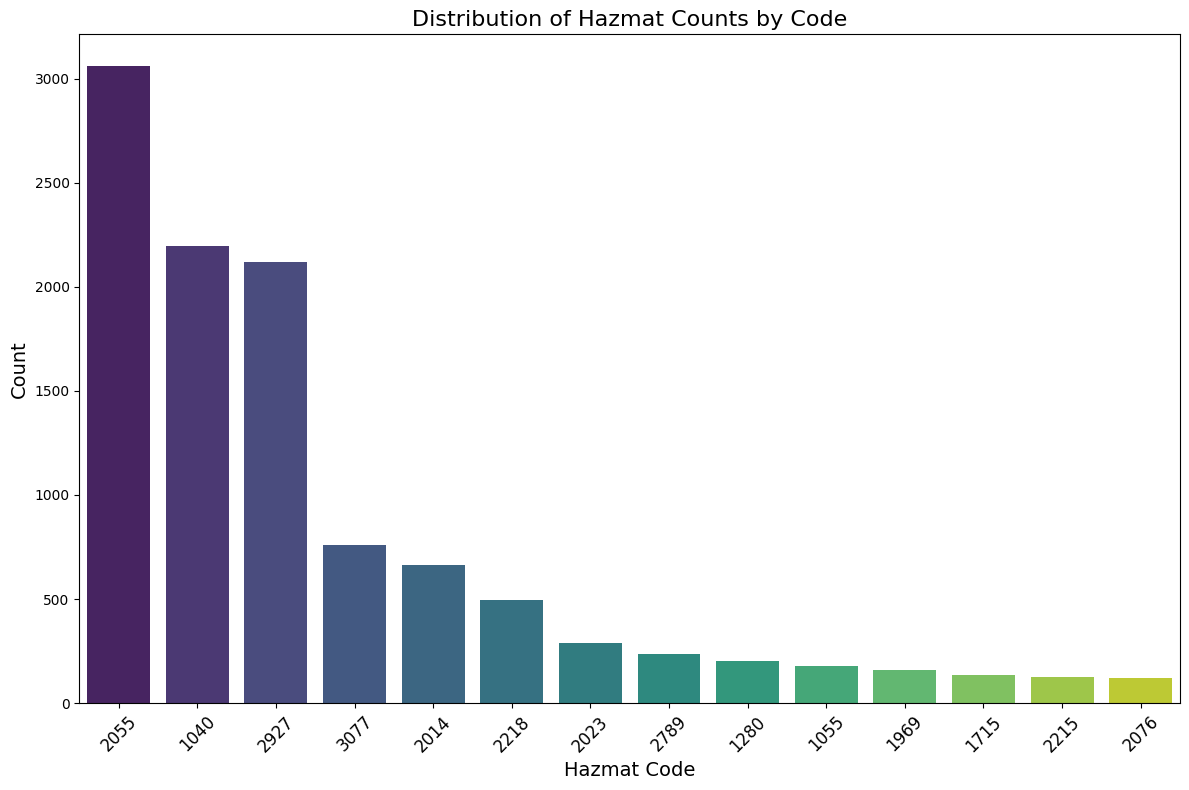

In [111]:
# maak een diagram om de normaalverdeling in de codes te laten zien en sorteer ze op count
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df_counts.sort_values(by='count', ascending=False)
# Plot maken
plt.figure(figsize=(12, 8))
sns.barplot(x='code', y='count', data=df_sorted, palette='viridis', hue='code')

# Aanpassingen aan de plot
plt.title("Distribution of Hazmat Counts by Code", fontsize=16)
plt.xlabel("Hazmat Code", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()


In [42]:
print(sorted_percentages)
df_percentages = pd.DataFrame()
rows = []

for item,percentage in sorted_percentages:
    code_x = item.split("/")[-1]
    code_label = None
    if not df_unnumber_labels[df_unnumber_labels['number'] == int(code_x)].empty:
        code_label = df_unnumber_labels[df_unnumber_labels['number'] == int(code_x)]['description'].values[0]

    if code_x == 2040:
        code_x = 1040
        code_label = df_unnumber_labels[df_unnumber_labels['number'] == int(code_x)]['description'].values[0]
    rows.append({'code': code_x, 'percentage': percentage, 'label': code_label, 'code_original': item})
    print(f"{code_x}: {percentage:.2f}%, {code_label}")

[('39/2055', 28.097633687348612), ('668/2927', 19.75964225824483), ('263/1040', 19.26588410657723), ('90/3077', 7.080305571082541), ('58/2014', 6.16731880007453), ('839/2218', 4.592882429662755), ('63/2023', 2.673746972237749), ('83/2789', 2.2079373951928454), ('33/1280', 1.8818706912614125), ('23/1055', 1.6489659027389605), ('23/1969', 1.4626420719209987), ('83/1715', 1.267002049562139), ('80/2215', 1.1738401341531581), ('68/2076', 1.1179429849077696), ('263/2040', 0.6987143655673561), ('283/1040', 0.4844419601267002), ('30/2055', 0.41922861934041367)]
2055: 28.10%, Styrene monomer, inhibited
2927: 19.76%, Toxic liquid, corrosive, organic, n.o.s. or Toxic liquid, corrosive, organic, n.o.s. Inhalation Hazard, Packing Group I, Zone A or B
1040: 19.27%, Ethylene oxide or Ethylene oxide with nitrogen up to a total pressure of 1MPa (10 bar) at 50° C
3077: 7.08%, Environmentally hazardous substance, solid, n.o.s. (not including waste)
2014: 6.17%, Hydrogen peroxide, aqueous solutions with m

In [51]:
df_percentages = pd.DataFrame(rows)
df_percentages

,code,percentage,label,code_original
0,2055,28.097634,"Styrene monomer, inhibited",39/2055
1,2927,19.759642,"Toxic liquid, corrosive, organic, n.o.s. or To...",668/2927
2,1040,19.265884,Ethylene oxide or Ethylene oxide with nitrogen...,263/1040
3,3077,7.080306,"Environmentally hazardous substance, solid, n....",90/3077
4,2014,6.167319,"Hydrogen peroxide, aqueous solutions with more...",58/2014
5,2218,4.592882,"Acrylic acid, inhibited",839/2218
6,2023,2.673747,Epichlorohydrin,63/2023
7,2789,2.207937,"Acetic acid, glacial or Acetic acid solution, ...",83/2789
8,1280,1.881871,Propylene oxide,33/1280
9,1055,1.648966,"Isobutylene see also Petroleum gases, liquefied",23/1055


In [52]:
df_percentages.drop('code_original', axis=1, inplace=True)
df_percentages

,code,percentage,label
0,2055,28.097634,"Styrene monomer, inhibited"
1,2927,19.759642,"Toxic liquid, corrosive, organic, n.o.s. or To..."
2,1040,19.265884,Ethylene oxide or Ethylene oxide with nitrogen...
3,3077,7.080306,"Environmentally hazardous substance, solid, n...."
4,2014,6.167319,"Hydrogen peroxide, aqueous solutions with more..."
5,2218,4.592882,"Acrylic acid, inhibited"
6,2023,2.673747,Epichlorohydrin
7,2789,2.207937,"Acetic acid, glacial or Acetic acid solution, ..."
8,1280,1.881871,Propylene oxide
9,1055,1.648966,"Isobutylene see also Petroleum gases, liquefied"


In [62]:
df_percentages[df_percentages['code'] == '2040']['label']

14    None
Name: label, dtype: object

In [71]:
# convert the code where the code is 2040 to 1040 and sum with the percentage of the other value of 1040

# find row of 2040 and replace with 1040 and replace label with 1040 label
# Step 1: Extract the label value from df_unnumber_labels
new_label = df_percentages[df_percentages['code'] == '1040']['label'].values[0]

# Step 2: Update the 'label' column in df_percentages
mask = df_percentages['code'] == '2040'
df_percentages.loc[mask, 'label'] = new_label

# Step 3: Update the 'code' column in df_percentages
df_percentages.loc[mask, 'code'] = '1040'
df_percentages


,code,percentage,label
0,2055,28.097634,"Styrene monomer, inhibited"
1,2927,19.759642,"Toxic liquid, corrosive, organic, n.o.s. or To..."
2,1040,19.265884,Ethylene oxide or Ethylene oxide with nitrogen...
3,3077,7.080306,"Environmentally hazardous substance, solid, n...."
4,2014,6.167319,"Hydrogen peroxide, aqueous solutions with more..."
5,2218,4.592882,"Acrylic acid, inhibited"
6,2023,2.673747,Epichlorohydrin
7,2789,2.207937,"Acetic acid, glacial or Acetic acid solution, ..."
8,1280,1.881871,Propylene oxide
9,1055,1.648966,"Isobutylene see also Petroleum gases, liquefied"


In [72]:
#group by code and sum the percentage
df_percentages = df_percentages.groupby('code').sum().reset_index()
df_percentages

,code,percentage,label
0,1040,20.449040,Ethylene oxide or Ethylene oxide with nitrogen...
1,1055,1.648966,"Isobutylene see also Petroleum gases, liquefied"
2,1280,1.881871,Propylene oxide
3,1715,1.267002,Acetic anhydride
4,1969,1.462642,"Isobutane see also Petroleum gases, liquified"
5,2014,6.167319,"Hydrogen peroxide, aqueous solutions with more..."
6,2023,2.673747,Epichlorohydrin
7,2055,28.516862,"Styrene monomer, inhibitedStyrene monomer, inh..."
8,2076,1.117943,Cresols
9,2215,1.173840,Maleic anhydride


In [73]:
# sort by percentage
df_percentages = df_percentages.sort_values(by='percentage', ascending=False)
df_percentages

,code,percentage,label
7,2055,28.516862,"Styrene monomer, inhibitedStyrene monomer, inh..."
0,1040,20.449040,Ethylene oxide or Ethylene oxide with nitrogen...
12,2927,19.759642,"Toxic liquid, corrosive, organic, n.o.s. or To..."
13,3077,7.080306,"Environmentally hazardous substance, solid, n...."
5,2014,6.167319,"Hydrogen peroxide, aqueous solutions with more..."
10,2218,4.592882,"Acrylic acid, inhibited"
6,2023,2.673747,Epichlorohydrin
11,2789,2.207937,"Acetic acid, glacial or Acetic acid solution, ..."
2,1280,1.881871,Propylene oxide
1,1055,1.648966,"Isobutylene see also Petroleum gases, liquefied"
